# Bellabeat Case Study

**<h3>1. Introduction**

Bellabeat is a high-tech manufacturer of health-focused products for women.Beallabeat is a successful small company, and they have the potential to become a larger player in the global smart device market.Urska Srsen, CoFounder and Chief Creative Office of Bellabeat,believes that analysing smart device fitness data could help the company unlock new growth opportunities. The CoFounder has asked the marketing analytics team to analyse the smart device usage data in order to gain insights into how people are using their smart devices.Then using this information, the Bellabeat company's panel will like to receive high- level recommendations for how these trends can inform the Bellabeat marketing strategy.

**<h3>2.  Objective**

**<h4> Business Task**

>   Analyse the smart device data to gain insights into how customers are using their smart devices.The insights discovered along with few high-level recommendations can guide the marketing strategy of the company thus making it a large player in smart device market.

**<h4> Ask**

> *  What are some trends in smart device usage?
> *  How could these trends apply to Bellabeat customers?
>*  How could these trends help influence Bellabeat marketing strategy?


**<H3>3. Prepare**

The Co-founder of Bellabeat has encouraged to use this Kaggle dataset - [FitBit Tracker Data](http://kaggle.com/arashnic/fitbit). This Kaggle dataset contains perosnal fitness tracker from thirty fitbit users who consented to submit their data. These users consented to the submission of personal tracker data, including minute level output for physical activity,heart rate and sleep monitoring.

> After reviewing the datasets, I have decided to use the below five datasets:
> 
> 1. daily_activity_merged.csv : This datasetcontains the daily activity duration,total steps covered in a day and calories burnt.
> 2. hourlyCAlries_merged.csv : collects data about calories burnt in an hour
> 3. hourlyIntensities_merged.csv : contains total and average intensity per hour
> 4. hourlySteps_merged.csv : contains total steps walked per hour in a day
> 5. sleepDay_merged.csv : collects data about total sleep duration per day
> 6. weightLogInfo_merged.csv : has data about weight and BMI count per day for each customer.

**<h3>4. Project Set-Up:**

 **<h4> 4.1 Installing the required packages:**

In [1]:
library(tidyverse)
library(dplyr)
library(lubridate)
library(ggplot2)
library(skimr)
library(tidyr)
library(janitor)
library(hms)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms




**<h4>4.2 Importing the datasets :**

In [2]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleepDay <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLog <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityHour = col_character(),
  TotalIntensity = col_double(),
  AverageIntensity = col_double(

**<h3> 5. Process the data**

**<h4>5.1 Exploring the datasets:**

In [3]:
head(daily_activity)
head(hourly_calories)
head(hourly_intensity)
head(hourly_steps)
head(sleepDay)
head(weightLog)


glimpse(daily_activity)
glimpse(hourly_calories)
glimpse(hourly_intensity)
glimpse(hourly_steps)
glimpse(sleepDay)
glimpse(weightLog)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


Id,ActivityHour,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,20,0.333333
1503960366,4/12/2016 1:00:00 AM,8,0.133333
1503960366,4/12/2016 2:00:00 AM,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,0.000000


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

**<h5>To know the no. of Fitbit users involved in each dataset:**

In [4]:

no_users <- data.frame(
           dataset_name = c("daily_activity","hourly_calories","hourly_intensity","hourly_steps","sleepDay"),
    count=c(n_distinct(daily_activity $ Id),n_distinct(hourly_calories $ Id), n_distinct(hourly_intensity $ Id), n_distinct(hourly_steps $ Id), n_distinct(sleepDay $ Id)))


no_users


dataset_name,count
<chr>,<int>
daily_activity,33
hourly_calories,33
hourly_intensity,33
hourly_steps,33
sleepDay,24


It is observed that 33 users have consented Fitbit to track their daily and hourly activities(daily and hourly datasets)with 24 users contributing to the sleep data(sleep dataset).

**Finding the no. of days one users was included in the DailyActivity dataset:**

In [5]:
no_users <- (group_by(daily_activity , Id) %>%
            summarise (total_days = n_distinct(ActivityDate)))
(head(arrange(no_users,total_days)))

Id,total_days
<dbl>,<int>
4057192912,4
2347167796,18
8253242879,19
3372868164,20
6775888955,26
7007744171,26


**<H4>5.2 Checking for null values in each dataset:**

In [6]:
is.na(daily_activity)
is.na(hourly_calories)
is.na(hourly_intensity)
is.na(hourly_steps)
is.na(sleepDay)
is.na(weightLog)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Id,ActivityHour,Calories
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE


Id,ActivityHour,TotalIntensity,AverageIntensity
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE


Id,ActivityHour,StepTotal
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE


All the datasets have not null values except for the 'Fat' column in weightLog dataset. The 'Fat' column has few missing values.

**<H3>6. Transforming the data:**

**<h4> 6.1 Working with DailyActivity dataset**

**<h5> 6.1.1 Converting the ActivityDate column to YYYY-MM-DD format:**

In [7]:
daily_activity $ ActivityDate <- mdy(daily_activity $ ActivityDate)
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


**Knowing the date range in DailyActivity dataset:**

In [8]:
min(daily_activity $ ActivityDate)
max(daily_activity $ ActivityDate)

[1] "2016-04-12"

[1] "2016-05-12"

The DailyActivity dataset covers the period from 12th April,2016-12th May,2016.

**<h5> 6.1.2 Finding the day corresponding to each date:**

In [9]:
daily_activity$Day_of_week <- wday(daily_activity$ActivityDate,label= TRUE)
head(daily_activity)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_week
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tue
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wed
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thu
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Fri
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Sat
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sun


**<h5> 6.1.3 Converting the very active,lightly active,fairly active,sedentary active minutes to hourly format by adding another columns:**

In [10]:
daily_activity <-
mutate(daily_activity , VeryActiveHour=daily_activity $ VeryActiveMinutes / 60) %>%
mutate(daily_activity , FairlyActiveHour = daily_activity $ FairlyActiveMinutes / 60) %>%
mutate(daily_activity , LightlyActiveHour = daily_activity $ LightlyActiveMinutes / 60) %>%
mutate(daily_activity , SedentaryHour = daily_activity $ SedentaryMinutes / 60)

head(daily_activity)



Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_week,VeryActiveHour,FairlyActiveHour,LightlyActiveHour,SedentaryHour
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tue,0.4166667,0.2166667,5.466667,12.133333
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wed,0.3500000,0.3166667,3.616667,12.933333
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thu,0.5000000,0.1833333,3.016667,20.300000
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Fri,0.4833333,0.5666667,3.483333,12.100000
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Sat,0.6000000,0.1666667,3.683333,12.883333
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sun,0.6333333,0.3333333,2.733333,8.983333


**<h5> 6.1.5 Converting the hourly formatted columns to rows by using the pivot function:**

In [11]:
 daily_activity <-daily_activity %>%
pivot_longer(c(VeryActiveHour,FairlyActiveHour,LightlyActiveHour,SedentaryHour),
             names_to="ActivityType",values_to="Activity_hour")
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_week,ActivityType,Activity_hour
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<chr>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tue,VeryActiveHour,0.4166667
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tue,FairlyActiveHour,0.2166667
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tue,LightlyActiveHour,5.4666667
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tue,SedentaryHour,12.1333333
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wed,VeryActiveHour,0.3500000
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wed,FairlyActiveHour,0.3166667


**<h4> 6.2 Checking the Sleep dataset:**

In [12]:
min(sleepDay $ TotalSleepRecords)
max(sleepDay $ TotalSleepRecords)

[1] 1

[1] 3

Minimum SleepRecord is 1 and maximum is 3

**<h5> 6.2.1 To find users with their SleepRecord count:**

In [13]:
no_of_users <- (group_by(sleepDay , Id)%>%
            summarise(no_of_records = n_distinct(TotalSleepRecords)))
            head(arrange(sleepDay, TotalSleepRecords))

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364


**<h5> 6.2.2 Converting the DateTime column to 'YYYY-MM-DD' format and seperating date in another column**

In [14]:
sleepDay_df <- sleepDay
sleepDay_df $ SleepDay <- mdy_hms(sleepDay_df $ SleepDay)
sleepDay_df $ Date <- as_date(sleepDay_df $ SleepDay)
head(sleepDay_df)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<date>
1503960366,2016-04-12,1,327,346,2016-04-12
1503960366,2016-04-13,2,384,407,2016-04-13
1503960366,2016-04-15,1,412,442,2016-04-15
1503960366,2016-04-16,2,340,367,2016-04-16
1503960366,2016-04-17,1,700,712,2016-04-17
1503960366,2016-04-19,1,304,320,2016-04-19


**Finding the minimum and maximum sleep duration:**

In [15]:
min(sleepDay_df $ TotalMinutesAsleep)
max(sleepDay_df $ TotalMinutesAsleep)

[1] 58

[1] 796

**<h5> 6.2.3 Considering 8-10 hours sleep is normal & healthy, categorising the sleep duration into less sleep,normal sleep and more sleep:**

In [16]:
sleepDay_df<- sleepDay %>%
mutate(sleepDay_df,Sleeptype = case_when((TotalMinutesAsleep<=400) ~ "Less Sleep" ,
       (TotalMinutesAsleep>400 & TotalMinutesAsleep<=600)~ "Normal Sleep" ,
       TotalMinutesAsleep>600 ~ "More Sleep")
       
      )
head(sleepDay_df)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Sleeptype
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,2016-04-12,1,327,346,2016-04-12,Less Sleep
1503960366,2016-04-13,2,384,407,2016-04-13,Less Sleep
1503960366,2016-04-15,1,412,442,2016-04-15,Normal Sleep
1503960366,2016-04-16,2,340,367,2016-04-16,Less Sleep
1503960366,2016-04-17,1,700,712,2016-04-17,More Sleep
1503960366,2016-04-19,1,304,320,2016-04-19,Less Sleep


**<h4> 6.3 Working with Hourly Data:**

 **<h5> 6.3.1 Combining the three hourly datasets- hourly_steps,hourly_calories,hourly_intensity into one dataset- hourly_dfp**

In [17]:
hourly_df <-inner_join(hourly_steps,hourly_calories,by= c("Id","ActivityHour"))
hourly_dfp <- inner_join(hourly_df,hourly_intensity, by = c("Id","ActivityHour"))
head(hourly_dfp)

Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373,81,20,0.333333
1503960366,4/12/2016 1:00:00 AM,160,61,8,0.133333
1503960366,4/12/2016 2:00:00 AM,151,59,7,0.116667
1503960366,4/12/2016 3:00:00 AM,0,47,0,0.000000
1503960366,4/12/2016 4:00:00 AM,0,48,0,0.000000
1503960366,4/12/2016 5:00:00 AM,0,48,0,0.000000


**<h5> 6.3.2 Converting the datetime column into 'YYYY-MM-DD' format and seperating the datetime column into date and time columns:**

In [18]:
hourly_dfp $ ActivityHour <- mdy_hms(hourly_dfp $ ActivityHour)

hourly_dfp $ Date <- as_date(hourly_dfp $ ActivityHour)
hourly_dfp $ Time <- as_hms(hourly_dfp $ ActivityHour)

head(hourly_dfp)

Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity,Date,Time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<time>
1503960366,2016-04-12 00:00:00,373,81,20,0.333333,2016-04-12,00:00:00
1503960366,2016-04-12 01:00:00,160,61,8,0.133333,2016-04-12,01:00:00
1503960366,2016-04-12 02:00:00,151,59,7,0.116667,2016-04-12,02:00:00
1503960366,2016-04-12 03:00:00,0,47,0,0.000000,2016-04-12,03:00:00
1503960366,2016-04-12 04:00:00,0,48,0,0.000000,2016-04-12,04:00:00
1503960366,2016-04-12 05:00:00,0,48,0,0.000000,2016-04-12,05:00:00


**Finding the minimum & maximum Step count:**

In [19]:
min(hourly_dfp $ StepTotal)
max(hourly_dfp $ StepTotal)

[1] 0

[1] 10554

**<h5> 6.3.3 Categorizing the totalstep count into Sedentary,Active,VeryActive:**

In [20]:
hourly_dfp <- hourly_dfp %>%
mutate(hourly_df, ActivityType = case_when ((StepTotal >=0 & StepTotal <=500) ~ "Sedentary",
                                          (StepTotal >= 501 & StepTotal <=5000) ~ "Active",
                                          (StepTotal > 5000) ~  "VeryActive"))
 
hourly_dfp $ ActivityHour <- mdy_hms(hourly_dfp $ ActivityHour)
                                         
head(hourly_dfp)

Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity,Date,Time,ActivityType
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<time>,<chr>
1503960366,2016-04-12 00:00:00,373,81,20,0.333333,2016-04-12,00:00:00,Sedentary
1503960366,2016-04-12 01:00:00,160,61,8,0.133333,2016-04-12,01:00:00,Sedentary
1503960366,2016-04-12 02:00:00,151,59,7,0.116667,2016-04-12,02:00:00,Sedentary
1503960366,2016-04-12 03:00:00,0,47,0,0.000000,2016-04-12,03:00:00,Sedentary
1503960366,2016-04-12 04:00:00,0,48,0,0.000000,2016-04-12,04:00:00,Sedentary
1503960366,2016-04-12 05:00:00,0,48,0,0.000000,2016-04-12,05:00:00,Sedentary


**<h4> 6.4 Checking the WeightLog data:**

**<h5> 6.4.1 Converting the date format in datetime column to YYYY-MM-DD format and seperating into date and time columns:**

In [21]:
weightLog $ Date <- mdy_hms(weightLog $ Date)
weightLog $ Dates <- as_date(weightLog $ Date)
weightLog $ Time <- as_hms(weightLog $ Date)
head(weightLog)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Dates,Time
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<date>,<time>
1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02,23:59:59
1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03,23:59:59
1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13,01:08:52
2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,2016-04-21,23:59:59
2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,2016-05-12,23:59:59
4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,TRUE,1.460938e+12,2016-04-17,23:59:59


**<h5> 6.4.2 Classifying the BMI values into Underweight,Normal weight,Overweight,Obese weight:**

In [22]:
weightLog $ Date <- ymd_hms(weightLog $ Date)
weightLog $ Dates <- as_date(weightLog $ Date)
weightLog $ Time <- as_hms(weightLog $ Date)
weightLog <- weightLog %>%
mutate(weightLog , WeightType  = case_when(BMI < 18.5  ~ "Underwight",
                                  BMI >= 18.5 & BMI <= 24.9 ~ "Normal weight",
                                  BMI >= 25 & BMI <=29.9 ~ "Overweight",
                                  BMI >= 30 ~ "Obese"))


head(weightLog)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Dates,Time,WeightType
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<date>,<time>,<chr>
1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02,23:59:59,Normal weight
1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03,23:59:59,Normal weight
1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,FALSE,1.460510e+12,2016-04-13,01:08:52,Obese
2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,TRUE,1.461283e+12,2016-04-21,23:59:59,Normal weight
2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,TRUE,1.463098e+12,2016-05-12,23:59:59,Normal weight
4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,TRUE,1.460938e+12,2016-04-17,23:59:59,Overweight


Body Mass Index(BMI) is a measurement of a person's weight with respect to his or her height. It is more of an indicator than a direct measurement of a person's total body fat.

**<H3> 7. Analysis:**

**<H4>7.1 To understand the patterns in daily activity:**

`summarise()` has grouped output by 'Day_of_week'. You can override using the `.groups` argument.



Day_of_week,ActivityType,Avg_hour
<ord>,<chr>,<dbl>
Sun,FairlyActiveHour,0.2421488
Sun,LightlyActiveHour,2.8995868
Sun,SedentaryHour,16.5042700
Sun,VeryActiveHour,0.3330579
Mon,FairlyActiveHour,0.2333333
Mon,LightlyActiveHour,3.2009722


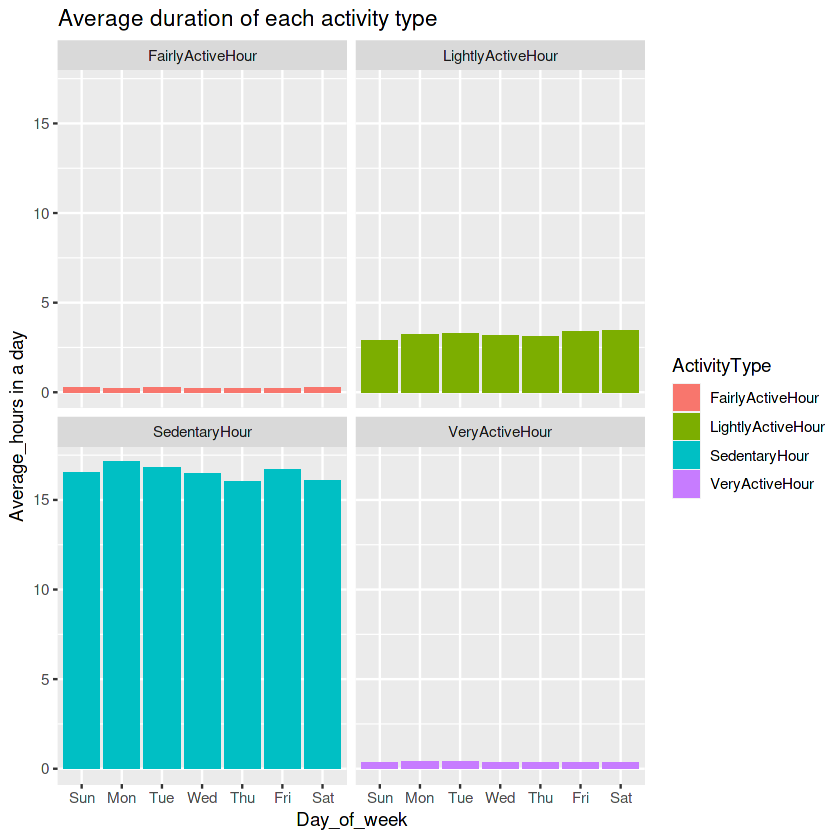

In [23]:
daily_activity_df <- group_by(daily_activity,Day_of_week,ActivityType)%>%
                    summarise(Avg_hour=mean(Activity_hour))
                      
head(daily_activity_df)


ggplot(data=daily_activity_df)+
geom_bar(aes(x=Day_of_week,y=Avg_hour,fill=ActivityType),stat="identity")+
facet_wrap(~ActivityType)+
labs(title="Average duration of each activity type")+
xlab("Day_of_week")+
ylab("Average_hours in a day")

* From the above grid chart, it can be seen that the Fitbit users spend most of their day sedentarily, on an average. About 15 hours,in a day comes under sedentary lifestyle which also includes their sleeping hours.
* About 4 average hours in a day count as Lightly Active activity type.
* While only about 1 hour can be counted for Very Active and Fairly active activity types.

**<H4> 7.2 To observe the walking duration pattern:**

Day_of_week,average_steps
<ord>,<dbl>
Sun,6933.231
Mon,7780.867
Tue,8125.007
Wed,7559.373
Thu,7405.837
Fri,7448.230
Sat,8152.976


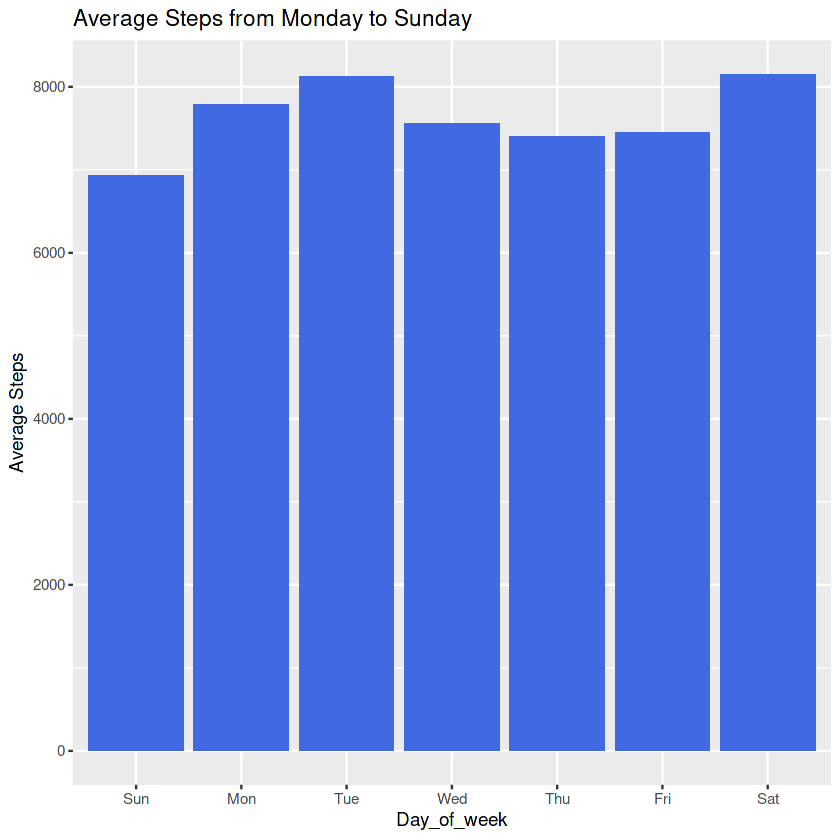

In [24]:
daily_dfs <- group_by(daily_activity,Day_of_week)%>%
            summarise(average_steps=mean(TotalSteps)) 
(daily_dfs)

## Plotting a visualisation on the average number of steps per day of week

ggplot(daily_dfs)+geom_bar(aes(Day_of_week,average_steps),stat="identity",fill='royal blue')+
labs(title="Average Steps from Monday to Sunday")+
     xlab("Day_of_week")+ 
ylab("Average Steps")

It can be seen that the users tend to cover maximum steps on Saturday followed by Tuesday. The steps start decreasing from Tuesday and spike up the most on Saturday; with the least number of steps on Sunday.
This shows that users are most active with walking on Tuesday and Saturday, with the least walking on Sunday.

**<H4> 7.3 To notice the period during which people are most active:**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



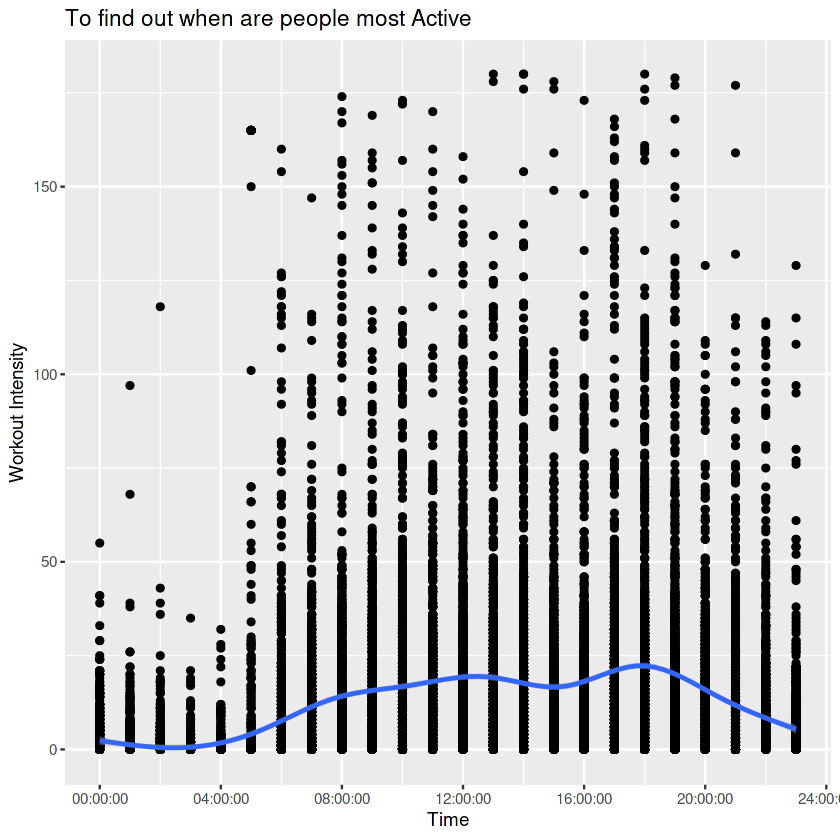

In [25]:
ggplot(data=hourly_dfp)+
geom_point(mapping=aes(x=Time,y=TotalIntensity))+
geom_smooth(mapping=aes(x=Time,y=TotalIntensity))+
xlab("Time")+
ylab("Workout Intensity")+
labs(title="To find out when are people most Active")

It can be observed that people start working out from 4 A.M with steady rise in number till 12 P.M. There is a spike at 6 P.M in the next half day, so users start working out with full intensity from 4 P.M with rising curve till 6 PM, where it reaches the peak. After 6 PM, people tend to stop working out.

**<H4> 7.4 To find out which ActivityType burns the most Calories:**

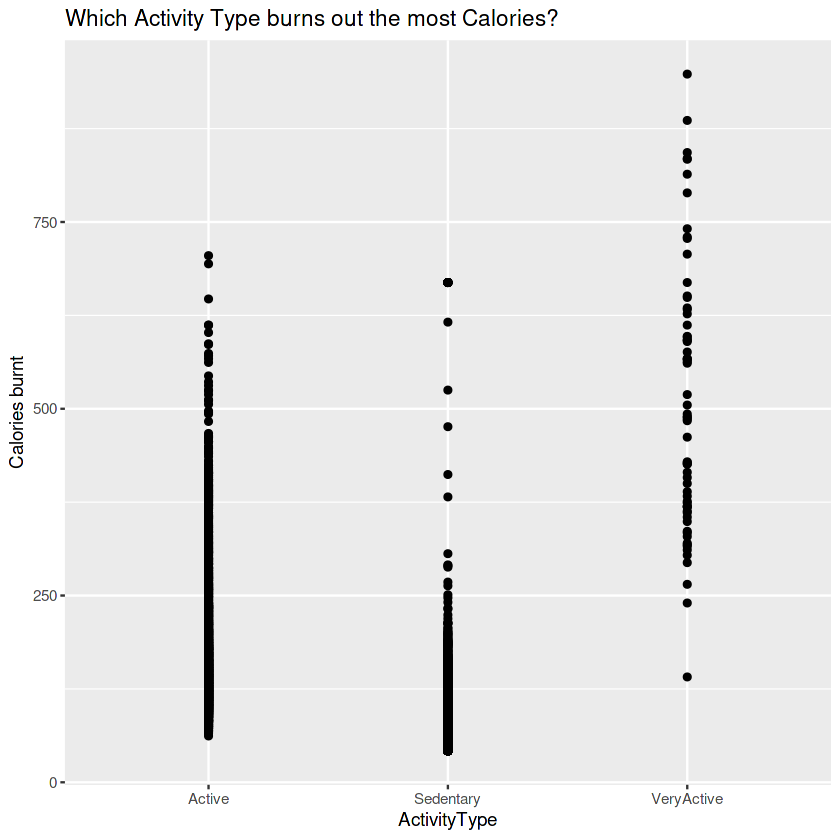

In [26]:
ggplot(data=hourly_dfp)+geom_point(mapping=aes(ActivityType,Calories))+
labs(title= "Which Activity Type burns out the most Calories?")+
    xlab("ActivityType")+
    ylab("Calories burnt")

'VeryActive' category tends to burn out the most calories followed by Active and Sedentary categories. Sedentary activitytype burns the least calories. 

<H4>

**<h4> 7.5 To observe the Sleeping pattern of the users:**

**Joining the sleep data with daily data to find a relation between the sleeping pattern of the users and the calories burnt during workouts:**

In [27]:
sleep_data <- inner_join(daily_activity,sleepDay_df,by="Id")
head(sleep_data)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,Calories,Day_of_week,ActivityType,Activity_hour,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Sleeptype
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<ord>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,1985,Tue,VeryActiveHour,0.4166667,2016-04-12,1,327,346,2016-04-12,Less Sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,1985,Tue,VeryActiveHour,0.4166667,2016-04-13,2,384,407,2016-04-13,Less Sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,1985,Tue,VeryActiveHour,0.4166667,2016-04-15,1,412,442,2016-04-15,Normal Sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,1985,Tue,VeryActiveHour,0.4166667,2016-04-16,2,340,367,2016-04-16,Less Sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,1985,Tue,VeryActiveHour,0.4166667,2016-04-17,1,700,712,2016-04-17,More Sleep
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,1985,Tue,VeryActiveHour,0.4166667,2016-04-19,1,304,320,2016-04-19,Less Sleep


Sleeptype,Avg_cal
<chr>,<dbl>
Less Sleep,2272.585
More Sleep,2224.542
Normal Sleep,2373.456


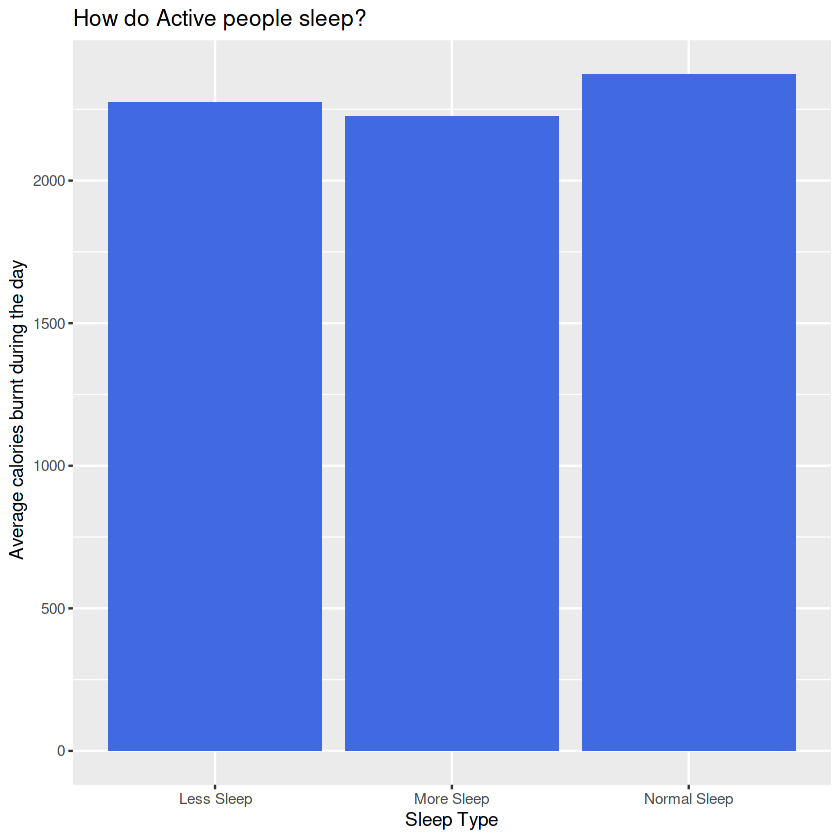

In [28]:

sleep_data_df <- select(sleep_data, Calories, Sleeptype)%>%
            group_by(Sleeptype)%>%
            summarise(Avg_cal=mean(Calories))
head(sleep_data_df)


ggplot(data=sleep_data_df)+geom_bar(aes(x=Sleeptype,y=Avg_cal),stat="identity", fill="royalblue")+
            labs(title="How do Active people sleep?")+
            xlab("Sleep Type")+
            ylab(" Average calories burnt during the day")

It can be observed that the people burning maximum calories in the day tend to have normal sleep cycle, ranging 8-10 hours. While people with less and more sleep shed few calories during the day compared to the people with normal sleep.

**<H4> 7.6 To observe the pattern in Calories burn out for each Activity Type:**

In [29]:
weight_data <- inner_join(daily_activity,weightLog,by="Id")
head(weight_data)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Dates,Time,WeightType
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<date>,<time>,<chr>
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02,23:59:59,Normal weight
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03,23:59:59,Normal weight
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02,23:59:59,Normal weight
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03,23:59:59,Normal weight
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12,2016-05-02,23:59:59,Normal weight
1503960366,2016-04-12,13162,8.5,8.5,0,1.88,0.55,6.06,0,⋯,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12,2016-05-03,23:59:59,Normal weight


WeightType,Avg_Calories
<chr>,<dbl>
Normal weight,1968.463
Obese,2172.806
Overweight,3114.987


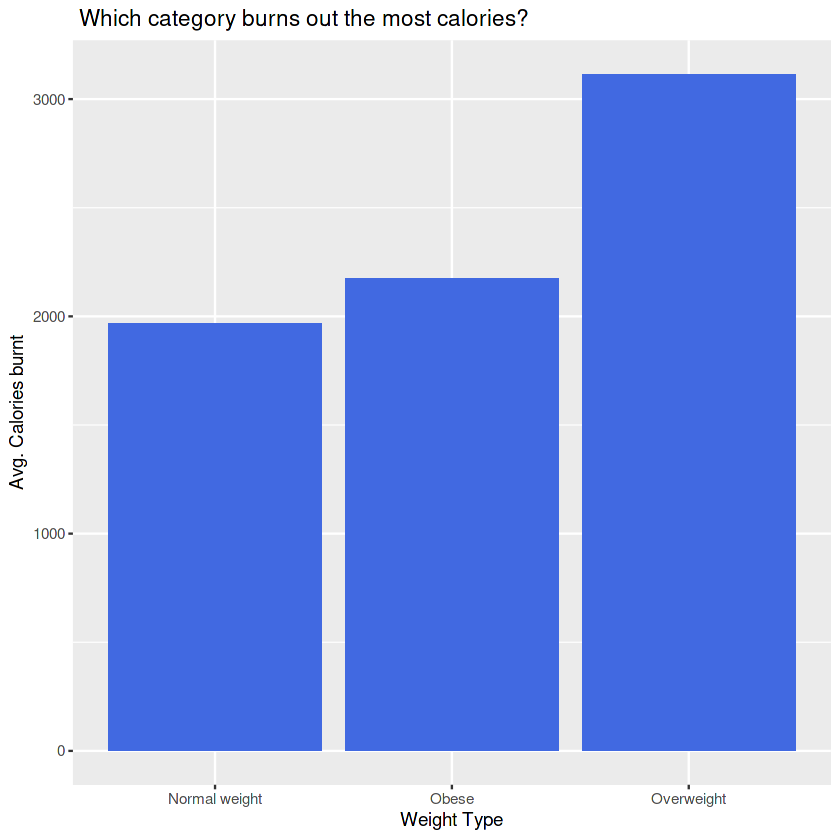

In [30]:
weight_data_df <-weight_data %>% 
             group_by(WeightType)%>%
            summarise(Avg_Calories= mean(Calories))
head(weight_data_df)


ggplot(data=weight_data_df)+geom_bar(aes(x=WeightType,y=Avg_Calories),stat="identity", fill="royalblue")+
labs(title=" Which category burns out the most calories?")+
xlab("Weight Type")+
ylab("Avg. Calories burnt")

It can be seen that Overweight category people burnout the most Calories followed by Obese and Normal weight categories. Obese and normal categories burn almost same amount of calories.

**<H3> 8. Summary:**

Here is the summarised set of analysis:

1. The datasets cover the range from 12th April,2016 to 12th May,2016.
2. From the daily dataset, I observed that, on an average, the users spend about 15 hours of their day in Sedentary lifestyle(including Sleep hours) with about 4 hours with Lightly active and 1 hour with Very Active activity.
3. The Overweight and the VeryActive category burns the most calories.
4. The Fitbit users tend to walk the most on Saturday and Tuesday.
5. Few people start working out from 4 am till 12 pm. Maximum Fitbit users' workout period is observed to be from 4 pm to 6 pm. 
6. From the sleeping pattern, i was able to infer that people buring out maximum calories during the day tend to have a normal sleep routine(8-10hours).


**<H3> 9. Act:**

 After analysing the datasets, here are a few strategies/personal recommendations, that i think, can guide the marketing team to help Bellabeat achieve greater heights  :

##### **1.  Since most of the users workout during 4-6 PM, the company can announce some competition on their app and declare winners daily based on their workout intensity and the calories burnt.These winners will then be eligible for some benefits.Few of these benefits include earning points/coupons which they can redeem in outlets selling sports accessories globally or getting free training sessions on any activity that the user prefers(swimming,yoga)**

* This marketing strategy will be hightly beneficial to Bellabeat as Bellabeat can have a tie-up with multiple sports outlets thus increasing its chances of getting recognised globally.
* The training sessions can be a win-win for the company by getting their users engaged and to the customers for improving their fitness.

##### **2. Bellabeat can plan for '3 months weight loss challenge' especially for the obese/over weight categories followed by few inspirational quotes notifications with every training video, released for this plan.**

*  This plan/motivation will help the overweight/obese class to believe in Bellabeat as they will feel included.
* This way, the company can display about inclusion/diversity for people of all sizes. Thus allowing Bellabeat to gain trust globally followed by an increase in its users.

##### **3. Bellabeat can also try to incorporate additional activity tracking features with their time duration that can track activities like Swimming, Cycling, Gymnastics,Yoga or any Sports games( Football,Wrestling,etc)**

* This can help Bellabeat to closely track their users' activity. Bellabeat can be informed of the activities that the users prefer,its frequency and duration.
* This will help Bellabeat to increase its business by including these activities in the form of customized trainings/challenges. This will positively impact the users and they will feel connected to it as their preferred activity's sessions have been tailored for them explicitly.
* This will heavily benefit Bellabeat's business with a strongly satisfied customer base worldwide. 